# CBD 3335 Data Mining and Analysis Assignment

### Group Members

##### Bhanu Prakash Mahadevuni C0850515 
##### Deeksha Naikap C0835440
##### Pramod Reddy Gurrala C0850493
##### Sai Varun Kollipara C0828403

In [1]:
import tweepy as tw
import pandas as pd
import os

In [2]:
from datetime import date
from datetime import datetime
import time

In [3]:
ACCESS_TOKEN = "1528781275615662083-zmUZvBkA2fQPHylftdSlkmcpME5KBw"
ACCESS_TOKEN_SECRET = "srqCPBCkAEQErxQPpId2TmA5Qk8vBhrR5Cr2XfPbtazo7"

CONSUMER_API_KEY =  "Ykh6aXczkLTW8Vx4lG8b74fSq"
CONSUMER_API_SECRET = "7zphS0C8Ae1gIyf54nq529zPOg5OLhFpfDgVVLc5sIG2z4ipFP"

### 1. Collecting data

In [5]:
# authentication label using twitter developer keys

auth = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)


api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# using the API object
#get tweets from my time line and storing it

my_tweets = api.home_timeline()
print(my_tweets)

[Status(_api=<tweepy.api.API object at 0x0000014F293D01F0>, _json={'created_at': 'Sat Jul 09 00:45:00 +0000 2022', 'id': 1545569676033392644, 'id_str': '1545569676033392644', 'text': 'For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gsyOfUWA1K', 'expanded_url': 'https://twitter.com/i/web/status/1545569676033392644', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="http://www.socialnewsdesk.com" rel="nofollow">SocialNewsDesk</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19402238, 'id_str': '19402238', 'name': 'Science News', 'screen_name': 'ScienceNews', 'location': 'Washington, DC', 'description': 'Coverin

In [7]:
type(my_tweets)

tweepy.models.ResultSet

In [8]:
# Pull all the tweets with id, username and location

for tweet in my_tweets:
    print(tweet.text)
    print(tweet.created_at, "\n", tweet.user.id, "\n", tweet.user.screen_name, "\n", tweet.text, "\n")

For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K
2022-07-09 00:45:00+00:00 
 19402238 
 ScienceNews 
 For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K 

See which waterfront escapes won't burn a hole in your wallet.
 https://t.co/2PYgL3dYts
2022-07-09 00:31:37+00:00 
 78077927 
 USNewsTravel 
 See which waterfront escapes won't burn a hole in your wallet.
 https://t.co/2PYgL3dYts 

RT @MikeSington: The sh*t, or ketchup, is hitting the wall. Washington Post: Steve Bannon wants to strike a deal and testify for the Jan 6…
2022-07-09 00:25:31+00:00 
 27493883 
 joncoopertweets 
 RT @MikeSington: The sh*t, or ketchup, is hitting the wall. Washington Post: Steve Bannon wants to strike a deal and testify for the Jan 6… 

RT @A_SHEKH0VTS0V: Russia is stealing Ukrainian grain and is burning the wheat it cannot steal

In [9]:
tweets = api.home_timeline(count=10)

In [10]:
type(tweets)

tweepy.models.ResultSet

In [11]:
# View the collected tweets in understanding format

for tweet in tweets:
    print(tweet.text)
    print(tweet.created_at, "\n", tweet.user.id, "\n", tweet.user.screen_name, "\n", tweet.text, "\n")

For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K
2022-07-09 00:45:00+00:00 
 19402238 
 ScienceNews 
 For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K 

See which waterfront escapes won't burn a hole in your wallet.
 https://t.co/2PYgL3dYts
2022-07-09 00:31:37+00:00 
 78077927 
 USNewsTravel 
 See which waterfront escapes won't burn a hole in your wallet.
 https://t.co/2PYgL3dYts 

RT @MikeSington: The sh*t, or ketchup, is hitting the wall. Washington Post: Steve Bannon wants to strike a deal and testify for the Jan 6…
2022-07-09 00:25:31+00:00 
 27493883 
 joncoopertweets 
 RT @MikeSington: The sh*t, or ketchup, is hitting the wall. Washington Post: Steve Bannon wants to strike a deal and testify for the Jan 6… 

RT @A_SHEKH0VTS0V: Russia is stealing Ukrainian grain and is burning the wheat it cannot steal

In [12]:
# Iterate and print tweets

for tweet in tweets:
    print(tweet.text)

For the first time, scientists have cataloged every different way that every known mineral can form and put all of… https://t.co/gsyOfUWA1K
See which waterfront escapes won't burn a hole in your wallet.
 https://t.co/2PYgL3dYts
RT @MikeSington: The sh*t, or ketchup, is hitting the wall. Washington Post: Steve Bannon wants to strike a deal and testify for the Jan 6…
RT @A_SHEKH0VTS0V: Russia is stealing Ukrainian grain and is burning the wheat it cannot steal. There is little doubt that Russia’s aim is…
RT @KyivIndependent: ⚡️Ex-NATO commander: Ukraine could deal devastating blow to Kremlin by attacking Kerch Strait bridge linking mainland…
RT @NormOrnstein: The Supreme Court was fine with people protesting at the homes of abortion clinic workers. Scalia, joined by his colleagu…
RT @SamRamani2: BREAKING: The US will send additional HIMARS advanced rocket systems to Ukraine in its $400 million military aid package
It looks like Pat Cipollone threw Trump under the bus. Good.
If you live i

## 1.1 Data Gathering for hashtags

#### #Altcoin

In [13]:
tweets_alt = api.home_timeline(count=100)

search_words_alt = "#Altcoin"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with altcoin hashtag
tweets_alt = tw.Cursor(api.search_tweets,
              q=search_words_alt,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_alt 

# print tweets
for tweet in tweets_alt:
    print(tweet.text)

Unexpected parameter: since
Unexpected parameter: since


RT @hernanlafalce: Which #altcoin you will never sell  in this bear market ? 🚀
RT @_Br41nf4r7_: What do you really know about #FireANTS 
$ANTS $rANTS $wANTS 
You don't want to miss out on that, do you?
Check out https:…
RT @_Br41nf4r7_: What do you really know about #FireANTS 
$ANTS $rANTS $wANTS 
You don't want to miss out on that, do you?
Check out https:…
RT @Taha86613152: @rovercrc Don’t missed #SHINJA 🥷🏿🔥
Buy Now and Happy later 🥷🏿🔥

#Shibnobi #Crypto #DeFi #BTC #SHIB #Ceek #AVAX #BNB
#Ethe…
#altseason #RHOP #SIHBAINUTOKEN #coinbase #binaryoptions #flokimusk #1centdream #gems #SAITAMA #cex #goku #kirby… https://t.co/hRsQSlrjhG
*THIS* Is Why Bitcoin, Ethereum, Solana, &amp; Crypto Is CRASHING! (Altcoins I Am Buying) - 

https://t.co/6iM5awLqzH… https://t.co/R3vvMoB2cP
RT @MonstersCoins: What #Gem are you buying more in this dip?🧐
#100xGems #BNB #Altcoin

👇👇👇
#altseason #RHOP #SIHBAINUTOKEN #coinbase #binaryoptions #flokimusk #1centdream #gems #SAITAMA #cex #goku #kirby… https://t.c

Unexpected parameter: since


RT @Crypto__emily: I am going to put $10,000 into your favorite #Altcoin

Just shill me your Favorite project which is undervalued
👇🏻👇🏻👇🏻
RT @SharksCoins: Shill me your next 100x #altcoin! 💎

I'm buying 💳
RT @Altcoinbird: good morning #crypto Twitter shill me your favorite altcoin #altcoin #nft
RT @MarlaPerreone: Which #altcoin will explode this week?
RT @MarlaPerreone: Which #altcoin will explode this week?
RT @IMMA98322275: Which #altcoin will do 100x next month? 📈💎

Shill me ⬇️⬇️
@altcryptocom The #altcoin I choose to be bullish on ever since the bearish started due to its trend and the potent… https://t.co/EaH44Wn1NP
RT @BrickkenSTO: It's finally time! We will be announcing a major milestone for the entire Brickken Ecosystem on Monday.

Hint: The blockch…
RT @Masked_Saurid: What will I buy next? 

#NFTProject #Bscgem #BSC #altcoin #memecoin #token #NFTs
RT @MrBigWhaleCEO: Shill me your next 1000x #AltCoin!
RT @MrBigWhaleREAL: Which #Altcoin will make 500x in 2022?💥🚀🌒

#VOLT
#BABYDO

Unexpected parameter: since


CRYPTO NEWS:  #India to roll out #CBDC using a graded approach: RBI Annual Report https://t.co/XWwWeDOQ6o #altcoin… https://t.co/0cUtIL3Lnd
What do you buy today? 🕵🏻‍♀️👀

#BSC  #BSCGems #100xgem #BNB  #cryptocurrencies #BTC #ETH #SOL  #DeFi #NFT… https://t.co/LdFrLpIP9I
RT @MonstersCoins: What are your favorite #memecoins right now??
#Altcoin #BNB #BSCGems

👇👇
RT @cryptojack: Which #altcoin is trending today?

👇🏻👇🏻👇🏻
RT @BDFischer: #EverRise $RISE #EverRevoke #EverRiseV3 #EverRiseEDU #DeFi #Crypto #Cryptocurrency #Polygon #EverSwap #NFTArt #Altcoin #Rise…
RT @MonstersCoins: Who has the most POWERFUL community in #memecoins 

1. #Kiba
2. #BABYDOGE
3. #KISHU
4. #PlugPro
5. #RichQUACK
6. #FLOKI…
1 Bitcoin ( #BTC )
Dollar: 19,409.03$ 

1 Bitcoin Cash ( #BCH )
Dollar: 1,02.44$ 

1 Ethereum ( #ETH )
Dollar: 1,07… https://t.co/DJFnHrNOeh
RT @MarlaPerreone: Which #altcoin will explode this week?
RT @1_cryptorich: Which underrated #altcoin 💎 would you put $10 into?
RT @Behrang_RBXS: #RBXSamurai

Unexpected parameter: since


#altcoin #cryptocurrency #CryptocurrencyMarket 

#Binance 

Top Futures today:
$LUNC $CRV $RLC https://t.co/ACxfRRpQg8
#altcoin #cryptocurrency #CryptocurrencyMarket 

$LRC looks really great!! https://t.co/pItZ0s7R10
RT @TheMoonCarl: Which underrated #altcoin 💎 would you put $1,000 into?
🚨 Check it out 👀 🚨“THE”Scary Monster has joined Twitter. Truly a 100% genuine person committed to spreading positiv… https://t.co/cjSLjTwgTN
RT @MeongToken: We will burn 266 TRILLION #MEONG (worth $73.500/336 BNB) on July 3!

GET READY, the countdown has just begun.🔥🚀

#bsc #meon…
RT @BSCGemsAlert: What do you buy today ? 🕵🏻‍♀️🔍

#BSC  #BSCGems #100xgem #BNB  #cryptocurrencies #BTC #ETH #SOL  #DeFi #NFT #Metaverse #BS…
RT @edamarieyy: 🔥 💣 Pump time 💣🔥 

🚀 I have 2.6 #BNB to invest 🚀

🔥 Drop your best proyect 🔥

#BSCGems #100xgem #BNB      #ETH #SOL  #DeFi…
RT @MeongToken: 📢#MEONG will Burn 266 TRILLION Tokens (worth $73.500/336 BNB).

📅 July 3, 2022

⏳The countdown continues..

Stay tuned for…
RT @Sai

Unexpected parameter: since


RT @BSCGemsAlert: Next pump #1000x 💹🚀🏝️

#altcoin #BSC #BSCGems #BSCGemsAlert     #memecoin #Blockchain #DeFi #BNB
RT @MrBigWhaleREAL: Which #Altcoin will make 500x in 2022?💥🚀🌒

#VOLT
#BABYDOGE
#LOCUSchain
#FLOKI
#MarvinInu
#ENQgame
#BlueSparrow
#AirCoin…
RT @BrickkenSTO: It's finally time! We will be announcing a major milestone for the entire Brickken Ecosystem on Monday.

Hint: The blockch…
RT @Bscgemalerts: Next pump #1000x 💹🚀🏝️
#altcoin
RT @hezhouxiao: Which #Altcoin will make 500x in 2022?💥🚀🌒
#AirCoin
#VOLT
#BABYDOGE
#LOCUSchain
#FLOKI
#MarvinInu
#ENQgame
#BlueSparrow
#Kib…
RT @MrBigWhaleCEO: Shill me your next 1000x #AltCoin!
RT @DarkZogi: get in $BEZOGE before it's too late ⏳⏳ 
 #LegendsOfBezogia #PLAYTOEARNGAMES #Crypto #PlaytoEarn #NFTs #play2earn #Crypto #Ren…
RT @altcryptocom: Which #altcoin are you bullish on today?

💹💹💹💹
RT @SharksCoins: Which #Altcoin will make 500x in 2022?💥🚀🌒

#VOLT
#BABYDOGE
#LOCUSchain
#FLOKI
#MarvinInu
#ENQgame
#BlueSparrow
#AirCoin
#K…
get in $BEZO

Unexpected parameter: since


RT @BSCGemsx100: Shill me your next x100 💎👀

#BSC  #BSCGems #100xgem #BNB  #cryptocurrencies #BTC #ETH #SOL  #DeFi #NFT #Metaverse #BSCGems…
RT @edamarieyy: 🔥 💣 Pump time 💣🔥 

🚀 I have 2.6 #BNB to invest 🚀

🔥 Drop your best proyect 🔥

#BSCGems #100xgem #BNB      #ETH #SOL  #DeFi…
RT @BSCGemsx100: Shill me your next x100 💎👀

#BSC  #BSCGems #100xgem #BNB  #cryptocurrencies #BTC #ETH #SOL  #DeFi #NFT #Metaverse #BSCGems…
RT @WhaleMultiverse: Always BULLISH on #Meme #Altcoin🚀
RT @MarlaPerreone: Which #altcoin will explode this week?
ApeCoin [APE] traders willing to go short can make most of this pattern - 

https://t.co/06IuEYPB7a

#Crypto… https://t.co/kgcZan9qvD
RT @TheMoonCarl: Which underrated #altcoin 💎 would you put $1,000 into?
RT @WhaleMultiverse: Which #AltCoin will 100x next week?
RT @DarkZogi: Buy $BEZOGE now or Cry later. 
 #LegendsOfBezogia #BEZOGE #PLAYTOEARNGAMES #Crypto #PlaytoEarn #NFTs #play2earn #Crypto #Rent…
RT @CryptoGemsWorld: Best #altcoin to buy right now is @_____

Unexpected parameter: since


RT @SaitamaUniverse: #Saitama can literally play an important/leading role in that technological revolution since #cryptocurrencies (along…
RT @GemKingdom1: I have $10.000 to invest. Shill me an #altcoin _________ ? 💵
RT @WhaleMultiverse: Which #AltCoin will 100x next week?
RT @altcryptocom: Which #altcoin are you bullish on today?

💹💹💹💹
RT @hernanlafalce: Which #altcoin you will never sell  in this bear market ? 🚀
#CRYPTOCURRENCIES are MOVING! Try https://t.co/1fbsW58g32 to scan for #altcoin and #bitcoin movements.

#BTC #ETH… https://t.co/XPQq4Ot19N
RT @Bscgemalerts: Next pump #1000x 💹🚀🏝️
#altcoin
RT @BSCGemsAlert: Next pump #1000x 💹🚀🏝️

#altcoin #BSC #BSCGems #BSCGemsAlert     #memecoin #Blockchain #DeFi #BNB
RT @CryptoEmdarks: What's that one #altcoin that you will absolutely hold until next bull run?🧐

👇👇


Unexpected parameter: since


RT @SharksCoins: Shill me your next 100x #altcoin! 💎

I'm buying 💳
RT @WhaleMultiverse: Always BULLISH on #Meme #Altcoin🚀
US DOJ Targets Baller Ape Rug Pull and Other Crypto Fraud - https://t.co/FLXFGUsWkF - #altcoin #altcoins #tokens… https://t.co/pTIPaLH3QT
RT @MarlaPerreone: Which #altcoin will explode this week?
RT @MrBigWhaleCEO: Shill me your next 1000x #AltCoin!
RT @TheMoonCarl: Which underrated #altcoin 💎 would you put $1,000 into?
RT @CryptoGemsWorld: Best #altcoin to buy right now is @_______??
RT @GemKingdom1: I have $10.000 to invest. Shill me an #altcoin _________ ? 💵
Whales are buying 140k #Bitcoin each month directly from exchanges - Glassnode

#btc #Bitcoin #crypto… https://t.co/Y46CRwh1N7
RT @WhaleMultiverse: Which #AltCoin will 100x next week?
RT @YvonneBobby1: WAKE UP ‼️‼️‼️‼️ #SPORTOKEN FAM 🦊🦊🦊🦊🏈🏀⚽️LETS KILL ONE ZERO #crypto #kripto #BSC #bscgem #altcoin #bitcoin  #bnb #binan…
RT @TheMoonCarl: Which underrated #altcoin 💎 would you put $1,000 into?
RT @hernanlafalce:

In [14]:
tweets_alt = tw.Cursor(api.search_tweets,
              q=search_words_alt,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_alt 

tweet_list_alt = [[tweet.created_at, tweet.user.screen_name, tweet.text,  tweet.user.id] for tweet in tweets_alt]

df_tweets_list_alt = pd.DataFrame(tweet_list_alt, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_alt.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:57+00:00,hanseungja1,RT @hernanlafalce: Which #altcoin you will nev...,1536307780730388487
1,2022-07-01 23:59:57+00:00,tavalez74,RT @_Br41nf4r7_: What do you really know about...,1438877328231354368
2,2022-07-01 23:59:34+00:00,godstime20,RT @_Br41nf4r7_: What do you really know about...,300307298
3,2022-07-01 23:57:29+00:00,HumphreyMacaul6,RT @Taha86613152: @rovercrc Don’t missed #SHIN...,1532124686410100736
4,2022-07-01 23:57:27+00:00,ShanerPhoto,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,1651285824


#### #Bitcoin

In [15]:
tweets_bit = api.home_timeline(count=100)

search_words_bit = "#Bitcoin"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with bitcoin hashtag
tweets_bit = tw.Cursor(api.search_tweets,
              q=search_words_bit,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_bit 

# print tweets
for tweet in tweets_bit:
    print(tweet.text)

Unexpected parameter: since
Unexpected parameter: since


RT @BTCGandalf: Plebs when they look at the #Bitcoin price during a bear market. https://t.co/j6zFf3MzTh
#Bitcoin Last Price $19257 #BTC 🚀
Daily Indicators:
•Variation since 00h00(UTC): -3.41%
•MACD:
 -MACD Line: -2072… https://t.co/o3qAZ439LO
RT @BTCismydrug: To Celebrate Reaching 1k Followers,
Giving Away 100$#BNB to one Lucky Follower 🔥🤑

To Participate:

✅Follow @BTCismydrug…
RT @TheCryptoLark: Many of the world's richest and most famous investors made their fortunes in bear markets! #bitcoin #crypto
RT @BitcoinMagazine: "Thank you for selling cheap." – El Salvador President on 80 #bitcoin purchase 🇸🇻 https://t.co/5jx7bhQ8jK
RT @DocumentingBTC: How saving works:

                                  your money
 everything  =        —————— 
      else…
Mood Tesla, mood #Bitcoin #tesla 🔥 https://t.co/1wYN2wnk2d
RT @saylor: My recent discussion with @MMCrypto on the state of the industry, #Bitcoin growth drivers &amp; models, benefits of proper regulati…
RT @SocialGood_Inc: ✨Win $100 in 

Unexpected parameter: since


RT @Man_Bear_Pleb: A great toss n catch by @nayibbukele and @LordFusitua #bitcoin https://t.co/c6ocwS8cAi
RT @Layanan20: Bitcoin 1-day activity: 
Market cap: IDR 5492.2T -0.07%
Market volume: IDR 958.4T +45.39%
Price: IDR 287.82M -0.11%
https://…
RT @DeFiHedgehog: Honk, Honk, HODL: How Bitcoin Fueled The Freedom Convoy And Defied Government Crackdown https://t.co/T0OpWKM1IW #Bitcoin…
RT @AurelienOhayon: #BITCOIN IS READY FOR A MASSIVE BULL RUN. https://t.co/PBGvGt84nA
RT @OfficialTravlad: If #Bitcoin  hits $18,000 in the next 24hrs, I will send $1,000 to someone that has retweeted and is following! 

Let’…
Buy YoStep Sneakers on YoBit and Earn $$$! Hurry to buy!
#yostep #stepn #ton #bitcoin
@AirdropStario This Project is a really great project. 
Hopefully one day it will be able to take their project to… https://t.co/ZA4dhoXjmn
RT @TheCryptoLark: Breaking! Voyager has suspended withdrawals! #bitcoin #crypto
RT @SJosephBurns: Major crypto broker Voyager Digital suspends all trading, dep

Unexpected parameter: since


RT @DocumentingBTC: #bitcoin is here to stay, forever

https://t.co/P3lVfqWyUo
RT @gate_io: #Bitcoin briefly tumbled below $19K and is able to regain some of its losses today.

And in the middle of some of the less pos…
4 hour top movers report #blockchain #crypto #cryptocurrency #kripto #kriptopara #trading #rixx #binance #bnb… https://t.co/MllExMUx24
RT @ODU_96: Message to open-minded Gold Bugs (not @PeterSchiff ) who continue to dismiss #Bitcoin, I like gold too! Gold is a great metal,…
Happy 4th of July and Happy Canada Day! Hopefully the loving people of these two great countries adopt #Bitcoin so… https://t.co/Yt6RvEv49D
RT @DocumentingBTC: #bitcoin is here to stay, forever

https://t.co/P3lVfqWyUo
RT @BTC_Archive: 💥 Whales are buying 140k #Bitcoin each month directly from exchanges - Glassnode
RT @BTC_Archive: 💥JUST IN: New spot #Bitcoin ETF application filed by VanEck.
@tom7471 @sco_bit @inlakech_74 @JamesMelville If you can't stand the volatility, you'll never see the gains.



Unexpected parameter: since


Candle of day 01/07/2022 closed.

Open: $ 19,897.39
High: $ 20,800.30
Low: $ 19,000.64
Close: $ 19,206.18

Change:… https://t.co/dD23T1UNQK
#CryptoQuantumLeap. How to determine the best exchange to use to buy or sell any #crypto token so you can get the b… https://t.co/Au081hzZhv
RT @BitcoinMagazine: BREAKING: El Salvador bought 80 more #bitcoin 🇸🇻
RT @jr_sojka: Massive Crypto Crash incoming.  

As soon as they let withdrawals happen… #Bitcoin backed by sadness…
@APompliano #Bitcoin  is now lower than it was in Dec 2017. You’re not too late.
Engagement on YouTube videos is at low levels I haven't seen in months.

No one cares about #crypto right now, peop… https://t.co/LEb8wYtQwY
RT @LayahHeilpern: Netflix is down 70% YTD
Facebook is down 51% YTD
Amazon is down 37% YTD
Apple is down 24% YTD
#Bitcoin is down 58% YTD…
RT @BitcoinMagazine: MicroStrategy CEO: It is a mistake to sell #bitcoin https://t.co/Cjt0XomKRW
RT @Stephan_barker: 75% of people never think. 
15% think they think. 
Only

Unexpected parameter: since


RT @BitcoinMagazine: 🚨 JUST IN: Yet another exchange has halted withdrawals.

Withdraw your #bitcoin from custodians!
RT @Roman_Trading: The #Bitcoin bottom won’t come until index stocks crash another 30%+ from here.

Stop trying to guess where it is with p…
RT @CedYoungelman: #Bitcoin Facts https://t.co/9SZBeDqEzk
🎼I found #bitcoin in a Blue vault at this location! Join me playing #coinhuntworld, It's awesome!… https://t.co/R5jO2EyJw0
RT @WRContest: 🚨 $1,000 #GIVEAWAY 🚨

TO ENTER:

🎯 FOLLOW Me @CryptoBusy @altcryptomars
🎯 LIKE, RT &amp; Tag 3

To help buy up the #Bitcoin dip…
The $BTC price is at $19,237.61 right now.
🔴 Compared to the last tweet, the price has dropped by $185.87 (0.96%).… https://t.co/6fWIVkMiKr
🧙‍♂️#Bitcoin Trade Setup

• Heading for 1 Hour Support  - DM for early access to trades like this one

#BTCUSDT… https://t.co/fADQF8EryQ
The owner of @TraxNYC telling people #bitcoin is trash. Then saying he's going to give a lesson on stocks and inves… https://t.co/FnTj7qYFv

Unexpected parameter: since


#Crypto exchanges are making Millions off consumer 💰 #Robinhood #Voyager #Coinbase etc have halted or denied access… https://t.co/6of7KQ2loI
RT @RD_btc: This ain’t over yet MF’ers #Bitcoin https://t.co/A82N8fB4fU
RT @Gus21MCalderon: 🚨BREAKING (since 1971):  "Bills of Credit" a.k.a. #fiat money is unconstitutional.  

Read this succinct article (inclu…
RT @OfficialTravlad: If #Bitcoin  hits $18,000 in the next 24hrs, I will send $1,000 to someone that has retweeted and is following! 

Let’…
RT @OfficialTravlad: If #Bitcoin  hits $18,000 in the next 24hrs, I will send $1,000 to someone that has retweeted and is following! 

Let’…
RT @davthewave: #Bitcoin  

I guess we'll know one way or the other soon enough... https://t.co/liGLlX5lIw
RT @BTC_Archive: 💥El Salvador bought another 80 #Bitcoin 🙌
RT @JobPreference: #Hiring?
Sign up now https://t.co/o7lVlsCHXv
FREE. NO MIDDLEMAN
#ArtificialIntelligence #MachineLearning #Python #DataSc…
RT @mcshane_writes: buying $1 worth of #Bitcoin for every

Unexpected parameter: since


I'm using @lofty_ai to co-invest in real estate with as little as $50. If you invest too, we both get a $25 gift ce… https://t.co/aukCnKeI5L
RT @OfficialTravlad: If #Bitcoin  hits $18,000 in the next 24hrs, I will send $1,000 to someone that has retweeted and is following! 

Let’…
RT @Bitboy_Crypto: What do the Terra Luna, Celsius, and Voyager fiascos tell us?

We are way earlier than you thought we are. This is a con…
RT @TheCryptoLark: Many of the world's richest and most famous investors made their fortunes in bear markets! #bitcoin #crypto
RT @BTC_Archive: 💥Take your #Bitcoin off exchanges!
RT @harris_irfan: This does not meet the requirements of sound money.

An Islamic coin already exists. #Bitcoin is the most Islamic form of…
RT @OfficialTravlad: If #Bitcoin  hits $18,000 in the next 24hrs, I will send $1,000 to someone that has retweeted and is following! 

Let’…
@SwingTrader1114 @jrob730 @CryptoFriday2 @saylor The #Bitcoin faithful should set up their own country to show thei…

In [16]:
tweets_bit = tw.Cursor(api.search_tweets,
              q=search_words_bit,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_bit

tweet_list_bit = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_bit]

df_tweets_list_bit = pd.DataFrame(tweet_list_bit, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_bit.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:58+00:00,TheEnder0317,RT @BTCGandalf: Plebs when they look at the #B...,1457345789018181632
1,2022-07-01 23:59:58+00:00,LivePriceCrypto,#Bitcoin Last Price $19257 #BTC 🚀\nDaily Indic...,1501922448324927500
2,2022-07-01 23:59:58+00:00,crypto_w1ens,RT @BTCismydrug: To Celebrate Reaching 1k Foll...,1534846051236331520
3,2022-07-01 23:59:56+00:00,spikes2021,RT @TheCryptoLark: Many of the world's richest...,1383027435374010368
4,2022-07-01 23:59:55+00:00,Wilfred48783293,"RT @BitcoinMagazine: ""Thank you for selling ch...",1145182549192380417


#### #Coindesk

In [17]:
tweets_coin = api.home_timeline(count=10)

search_words_coin = "#Coindesk"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with coindesk hashtag
tweets_coin = tw.Cursor(api.search_tweets,
              q=search_words_coin,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_coin 


In [18]:
tweets_coin = tw.Cursor(api.search_tweets,
              q=search_words_coin,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_coin

tweet_list_coin = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_coin]

df_tweets_list_coin = pd.DataFrame(tweet_list_coin, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_coin.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:04:01+00:00,Rohekbenitez20,RT @ShapeShift: In this recently published #Co...,1135219075548876801
1,2022-07-01 22:00:03+00:00,BTCticker,One Bitcoin now worth $19368.859. Market Cap $...,1323280062
2,2022-07-01 20:55:54+00:00,1NationUnderXRP,Don’t forget the companies who own #coindesk -,1453880435562348544
3,2022-07-01 20:14:16+00:00,x3tko,The Crypto CEO Who Doesn't Want the Job #coind...,340070780
4,2022-07-01 20:00:03+00:00,BTCticker,One Bitcoin now worth $19359.059. Market Cap $...,1323280062


#### #Cryptocurrency

In [19]:
tweets_cry = api.home_timeline(count=140)

search_words_cry = "#Cryptocurrency"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with cryptocurrency hashtag
tweets_cry = tw.Cursor(api.search_tweets,
              q=search_words_cry,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_cry 

# print tweets
for tweet in tweets_cry:
    print(tweet.text)

Unexpected parameter: since
Unexpected parameter: since


RT @_Br41nf4r7_: What do you really know about #FireANTS 
$ANTS $rANTS $wANTS 
You don't want to miss out on that, do you?
Check out https:…
RT @WRContest: 🔥USD150 Twitter Giveaway🔥

We are giving a total prize of $150 to 3 lucky winners!

To Enter:

✅ Follow Me @RindNodes &amp; @alt…
RT @0xHerrCooLes: 🎁 Mega Giveaway - Çekiliş 🎁

🏆Prizes
🏆1 x $50 $ETH / $USDT 
🏆5 x WL Spots

📜 Rules
1️⃣ ❤+♻️+ tag 3 active friends
2️⃣ Fol…
🚨🚨🚨 Crypto alert:

• Bollinger Bands Breakout alert (15m)
• Pair [#LTC-#USDT]

#crypto #nft #cryptocurrency #defi… https://t.co/gXSJ6EFW9m
RT @Ilovenft21: RT if you think #crypto is going to replace #Fiat. My fav #cryptocurrency is #RichQUACK
RT @_Br41nf4r7_: What do you really know about #FireANTS 
$ANTS $rANTS $wANTS 
You don't want to miss out on that, do you?
Check out https:…
RT @Marvin_Inu: $MARVIN welcomes @KhabyLame to the world of #Cryptocurrency! 🐶 #MarvinInu #KhabyLame #Binance https://t.co/pgyP7tWQQB
@AirdropStario This Project is a really great project. 

Unexpected parameter: since


RT @CryptoHayes: "Number Three" is a sad but predictable story of #cryptocurrency centralised trading and lending businesses blowing up due…
#CryptoQuantumLeap. How to determine the best exchange to use to buy or sell any #crypto token so you can get the b… https://t.co/Au081hzZhv
RT @CryptoKojima: Congrats #LINU for first listing on CEX, we are proud of the developer's very fast performance in just a month 🥳🥳
 
$LINU…
RT @Fatemeh_RBXS: Welcome to RBXS platform,giving you ample space to display your creativity and get rewarded
Digital marketing 
⬇️⬇️⬇️
htt…
Engagement on YouTube videos is at low levels I haven't seen in months.

No one cares about #crypto right now, peop… https://t.co/LEb8wYtQwY
RT @WatcherGuru: JUST IN: Meta has announced that it will shut down its #cryptocurrency money-transfer service pilot, Novi on September 1.
RT @GinoAssereto: 🔥 .@TokenHuntersApp AIRDROP HAS STARTED 🔥

🪙 100,000 $HUNT Prize Pool ($ 1,000)
🤩 20 Winners

Join the airdrop campaign h…
RT @zelcore_io:

Unexpected parameter: since


RT @koinswap_io: 🪂KOINSWAP AIRDROP🪂 

👉Register with https://t.co/KKmPQklbM8 
👉Get 1000 KST tokens in your dashboard. 
👉Copy your referral…
🚨🚨🚨 Crypto alert:

• Bollinger Bands Breakout alert (15m)
• Pair [#VET-#USDT]

#crypto #NFT #cryptocurrency #defi… https://t.co/PbgLBJEdwb
🎼I found #bitcoin in a Blue vault at this location! Join me playing #coinhuntworld, It's awesome!… https://t.co/R5jO2EyJw0
I bought $1k of the Top 10 Cryptos on January 1st, 2018 (MAY Update/Month 53 DOWN -32%) https://t.co/p8qqljiw6B… https://t.co/9euBRmCXn9
I bought $1k of the Top 10 Cryptos on January 1st, 2018 (MAY Update/Month 53 DOWN -32%) https://t.co/JWCDApDAny #CryptoCurrency
RT @AndieDog: Payments have already been completed! 🚀

Would you like to be a VIP member and earn #USDT weekly? 💰

Join and buy your pack h…
RT @Fatemeh_RBXS: With us,your voice could be heard 
Be a VOICE not an ECHO 🟢@RBXSamurai 

https://t.co/A6Amj7HOmi
💦💦💦💦💦💦💦
#RBXSamurai #RBX…
RT @phenixfinance: The Flaming Phenix Club #NFTs ar

Unexpected parameter: since


RT @RindNodes: 🔥USD150 Twitter Giveaway🔥

We are giving a total prize of $150 to 3 lucky winners!

To Enter:

✅ Follow @RindNodes's Twitter…
RT @OfficialMandox: 🚨 Banana Club Members there is another vote that is needed in Discord 

@BananaClubToken 

#dao #defi #crypto #cryptocu…
RT @WRContest: 🔥USD150 Twitter Giveaway🔥

We are giving a total prize of $150 to 3 lucky winners!

To Enter:

✅ Follow Me @RindNodes &amp; @alt…
🚨🚨🚨 Crypto alert:

• Bollinger Bands Breakout alert (15m)
• Pair [#NULS-#USDT]

#crypto #nft #cryptocurrency #defi… https://t.co/l6a49s46RX
RT @Ilovenft21: RT if you think #crypto is going to replace #Fiat. My fav #cryptocurrency is #RichQUACK
RT @CentricBunny: I like to follow all #CentricWarriors! Give me money emoji in comment or just hit like button, and follow me, and i will…
RT @CentricBunny: Centric believe in financial freedom, if you believe too, check https://t.co/W5wq26Wydo #cns #CNR #crypto #cryptocurrency…
RT @CentricBunny: Be part of #centricwarriors. B

Unexpected parameter: since


RT @OfficialMandox: 🚨 Banana Club Members there is another vote that is needed in Discord 

@BananaClubToken 

#dao #defi #crypto #cryptocu…
🚨🚨🚨 Crypto alert:

• Bollinger Bands Breakout alert (15m)
• Pair [#ETC-#USDT]

#crypto #NFT #cryptocurrency #defi… https://t.co/MDw6ef9Ohb
RT @JoeR_Mandala: Trade at Mandala Exchange with the comfort of knowing your crypto is always safe and always available for withdrawal.....…
RT @CryptoKojima: Congrats #LINU for first listing on CEX, we are proud of the developer's very fast performance in just a month 🥳🥳
 
$LINU…
RT @BTCTN: #Coincoinx, a #cryptocurrency exchange in #Venezuela, has announced the launch of a service that will combine crypto and fiat to…
RT @SeniorCryptos: What do you buy today? 🕵🏻‍♀️👀

#BSC  #BSCGems #100xgem #BNB  #cryptocurrencies #BTC #ETH #SOL  #DeFi #NFT #Metaverse   #…
RT @WRContest: 🔥USD150 Twitter Giveaway🔥

We are giving a total prize of $150 to 3 lucky winners!

To Enter:

✅ Follow Me @RindNodes &amp; @alt…
RT @Demonm2

Unexpected parameter: since


Man of his word! #cryptocurrency #awrt https://t.co/sbjd53PdgS
RT @AsimiToken: #ASIMI providing the best #Advertising platform especially #Crypto &amp; #NFT Projects. Pay per website view in lowest rate .…
RT @ferkjerbiden: Not your keys, not your crypto - get a @Ledger 👏🏼 

#GACC #MACC #NFTs #NFTCommunity #cryptocurrency #ETH #ETHNFTs #ColdSt…
RT @ABiMH01: #Saitama #SaitamaWolfPack #SaitaPro $Saita
#Crypto #CryptoCurrency #CryptoNews #Ethereum #Bitcoin #Eth #BTC
#SaitamaToken
#Lun…
RT @AsimiToken: #ASIMI providing the best #Advertising platform especially #Crypto &amp; #NFT Projects. Pay per website view in lowest rate .…
RT @ABiMH01: #Saitama #SaitamaWolfPack #SaitaPro $Saita
#Crypto #CryptoCurrency #CryptoNews #Ethereum #Bitcoin #Eth #BTC
#SaitamaToken
#Lun…
🚨🚨🚨 Crypto alert:

• Bollinger Bands Breakout alert (15m)
• Pair [#IOTA-#USDT]

#crypto #nft #cryptocurrency #defi… https://t.co/YbtmROQRhU
RT @ABiMH01: #Saitama #SaitamaWolfPack #SaitaPro $Saita
#Crypto #CryptoCurrency #CryptoN

Unexpected parameter: since


RT @Roman_Trading: Why are you people shorting your brains out into demand.

I told my students to close their shorts this morning near the…
RT @RindNodes: 🔥USD150 Twitter Giveaway🔥

We are giving a total prize of $150 to 3 lucky winners!

To Enter:

✅ Follow @RindNodes's Twitter…
RT @AsimiToken: #ASIMI providing the best #Advertising platform especially #Crypto &amp; #NFT Projects. Pay per website view in lowest rate .…
RT @RealShibaDoge: 4000+ new holders, was up over 75%, trended #1, #3 &amp; #4 on @CoinMarketCap &amp; @coingecko

Get involved in our two giveaway…
RT @Ilovenft21: RT if you think #crypto is going to replace #Fiat. My fav #cryptocurrency is #RichQUACK
RT @metfxmetaverse: 📢ICYMI📢

🔒We're locked and loaded🔒

Get ready for METFX!

#metfx #metfxwatchtoearn #watchtoearn #watch2earn #idolaunchp…
Opened new short position worth 1500 usd @ 19216.5 with ID 491.

Prediction value at time of opening was 0.92/1.

O… https://t.co/PiUmkwXIVd
RT @metfxmetaverse: Have you seen our la

Unexpected parameter: since


We need your help and support to get listed at @exbitron 
Please go ahead sign up and  #Vote 
Also use our referal… https://t.co/j7C1D9VKyX
🚀 🚀 🚀 $1,196,868 BTCUSDT LONGED @$19,250.00 on #Binance (23:54:57 UTC) #BTC #cryptocurrency
RT @OfficialMandox: 🚨 Banana Club Members there is another vote that is needed in Discord 

@BananaClubToken 

#dao #defi #crypto #cryptocu…
RT @SyrioCrypto: 🥳BitMart's Trading Competition is Coming！

🤩Have Fun and Share A $200,000 Prize Pool

⏰Period: 07/01/2022 10:00 AM - 07/31…
Luisesman found # in a Blue vault at this location! Join me playing #coinhuntworld, It's awesome!… https://t.co/PiLVWWLG5R
$link No hopium here....just some based ass shit!!  Swift...swift...swift...swift... #cryptocurrency #Cryptos $btc https://…
RT @ta64945087: Good move by the #Saitama development team, #SaitamaLLC now in the Emirates 💯. It's just good business, and we (🐺's) are pa…
RT @Touraj_samurai: The only marketing that can make your projects very successful.
#RBXS #RBXSam

Unexpected parameter: since


Luisesman found # in a Blue vault at this location! Join me playing #coinhuntworld, It's awesome!… https://t.co/RMAXRSHdPH
Digital Currencys are unstopable !!!  #ripple #XRP #Bitcoin #btc #Ether #ethereum #crypto #cryptocurrency #money… https://t.co/YscDv7iWwm
🚨🚨🚨 Crypto alert:

• MACD Cross alert (15m)
• Pair [#VET-#USDT]

#crypto #Nft #cryptocurrency #defi #trading 

https://t.co/haM1U1vwCu
$ARTNA https://t.co/Igan1bHmoQ Artesian Resources Corp. Our algorithm foretells that this companie s stock price va… https://t.co/vQJTG6FMCr
RT @WatcherGuru: JUST IN: Meta has announced that it will shut down its #cryptocurrency money-transfer service pilot, Novi on September 1.
RT @BananaClubToken: 🚨 Voting for the Banana Club Token Tokenomics is Live 🚨 

🍌 The Banana Club Token is a true community #defi project gi…
The idea is interesting. I carefully watch the news of the project. We can do this! I believe in the success of the… https://t.co/ZRRMzm0b2O
JPMorgan said #Crypto has now replaced rea

Unexpected parameter: since


🚨🚨🚨 Crypto alert:

• MACD Cross alert (1h)
• Pair [#TRX-#USDT]

#crypto #nft #cryptocurrency #defi #trading 

https://t.co/aUaWyjIuwA
RT @analyticsinme: Ethereum (ETH) and Bitgert (BRISE) Are Preparing For A Bull Run This Month
https://t.co/dEUNDzMitj
#Ethereum #ETH #Bitge…
Cryptocurrency and NFTs #CryptoCurrency via https://t.co/I1BzNsjq7S https://t.co/kisFmy8Zon
RT @SteveAokid: Do you like Ape? 
Do you like humans? 
Do you like zombies? 
Do you like God?
.
.
.
.
.
.
#NFTGiveaway 
#NFTs 
#nftcollecto…
RT @OfficialMandox: 🚨 Banana Club Members there is another vote that is needed in Discord 

@BananaClubToken 

#dao #defi #crypto #cryptocu…
RT @Crypto_Arturito: 🚨 50k $LKMEX #Giveaway🚨

🥇 50k $LKMEX

☑️Follow Me
☑️❤️ &amp; RT
☑️Tag 3 Friends

⏰ 72 Hours

Good Luck 🍀🤞🏼

#ElrondNFT #N…
RT @SaitamaUniverse: Having worked for a buy-side institutional investor for more than 13Y, looking at the fundamentals before investing in…
RT @C3NTUR10N1NV3ST: CIX Token public sale is now live!
Get CIX n

Unexpected parameter: since


Crypto crash threatens North Korea's stolen funds as it ramps up weapons tests https://t.co/r2A5MxI2lG by @Reuters… https://t.co/AtxFoLHukD
RT @BTCTN: #Coincoinx, a #cryptocurrency exchange in #Venezuela, has announced the launch of a service that will combine crypto and fiat to…
RT @0xLachain: LA staking program has increased earning interest 3x times only for a week! 💸
Follow the link ▶️https://t.co/WttHoRkMNn and…
RT @Behrang_RBXS: #NFT Collection That Gets #Rewarded from IRL Businesses🔥

#DUMBLE #DumbleDAO #MagicalMutts 

@DumbleDAO 

#RBXS #RBXSamur…
RT @CryptoReeko: A picture can tell a thousand words. In this one it's just VOLT ! @VoltInuOfficial 

#CryptoReeko #VOLTINU #CRYPTO #Dextoo…
🚨🚨🚨 Crypto alert:

• MACD Cross alert (15m)
• Pair [#TRX-#USDT]

#crypto #nft #cryptocurrency #defi #trading 

https://t.co/yobYDpgmvO
RT @TokenJay: Data breach of NFT marketplace OpenSea may expose customers to phishing attacks https://t.co/66jzCelAx1 #CryptoCurrency (from…
RT @btc4cia: @nibiruv

In [20]:
tweets_cry = tw.Cursor(api.search_tweets,
              q=search_words_cry,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_cry

tweet_list_cry = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_cry]

df_tweets_list_cry = pd.DataFrame(tweet_list_cry, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_cry.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:57+00:00,tavalez74,RT @_Br41nf4r7_: What do you really know about...,1438877328231354368
1,2022-07-01 23:59:52+00:00,rza13444772,RT @WRContest: 🔥USD150 Twitter Giveaway🔥\n\nWe...,861769458079150080
2,2022-07-01 23:59:44+00:00,0xHerrCooLes,RT @0xHerrCooLes: 🎁 Mega Giveaway - Çekiliş 🎁\...,1454814469532569601
3,2022-07-01 23:59:43+00:00,_Crypto_Alerts,🚨🚨🚨 Crypto alert:\n\n• Bollinger Bands Breakou...,1382427530314022912
4,2022-07-01 23:59:35+00:00,bahar_manzoor,RT @Ilovenft21: RT if you think #crypto is goi...,771741164265476096


#### #Gold

In [21]:
tweets_gol = api.home_timeline(count=140)

search_words_gol = "#Gold"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with gold hashtag
tweets_gol = tw.Cursor(api.search_tweets,
              q=search_words_gol,
              lang="en",        
              since=date_since, until=end_date).items(140)

tweets_gol 


In [22]:
tweets_gol = tw.Cursor(api.search_tweets,
              q=search_words_gol,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_gol 

tweet_list_gol = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_gol]

df_tweets_list_gol = pd.DataFrame(tweet_list_gol, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_gol.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:31+00:00,LarsonMykel,#SurveillanceCapitalism is a virus that turns ...,1501049173390422018
1,2022-07-01 23:59:06+00:00,boylerpf,Art Deco #Vintage #Wedding Band Ring 14K #Gold...,49309789
2,2022-07-01 23:57:31+00:00,democrat_good,RT @badcharts1: Did you know #silver never fai...,1361088253986750466
3,2022-07-01 23:56:12+00:00,GermanyKrins,RT @VLRTRW: @HannesZipfel #Euro #USDollar #End...,1345130504199282695
4,2022-07-01 23:55:58+00:00,GermanyKrins,RT @VLRTRW: @PeterBorbe #Euro #USDollar #Endga...,1345130504199282695


#### #Apple

In [23]:
tweets_app = api.home_timeline(count=140)

search_words_app = "#Apple"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with apple hashtags
tweets_app = tw.Cursor(api.search_tweets,
              q=search_words_app,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_app 


In [24]:
tweets_app = tw.Cursor(api.search_tweets,
              q=search_words_app,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_app

tweet_list_app = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_app]

df_tweets_list_app = pd.DataFrame(tweet_list_app, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_app.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:51+00:00,BigguyStore,Are you looking for a new accessory for your p...,1283164155243986944
1,2022-07-01 23:59:01+00:00,marce_170018,RT @AdamJMatlock: Me trying to relax…\n\n#appl...,1314681725134438402
2,2022-07-01 23:58:02+00:00,theloganstark,RT @appleinsider: Late #Apple co-founder #Stev...,1087546006902779904
3,2022-07-01 23:56:52+00:00,WesWookBeats,Who do I need to call at @Ableton &amp; #Apple...,47697132
4,2022-07-01 23:56:35+00:00,NYMetsChief,15 minutes on Lindor’s hair everyone! #lgm @A...,835526448173756416


#### #Google

In [25]:
tweets_goo = api.home_timeline(count=140)

search_words_goo = "#Google"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with google hashtags
tweets_goo = tw.Cursor(api.search_tweets,
              q=search_words_goo,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_goo 


In [26]:
tweets_goo = tw.Cursor(api.search_tweets,
              q=search_words_goo,
              lang="en",
              since=date_since, until=end_date).items(140)

tweets_goo

tweet_list_goo = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_goo]

df_tweets_list_goo = pd.DataFrame(tweet_list_goo, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_goo.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:59:15+00:00,LIVINGTheNewSt1,"Technical point, #Rose. I haven't finished rea...",1253132880684990467
1,2022-07-01 23:58:03+00:00,NicoConlin,Chrome/Youtube is so busted. Usually I can hav...,1416894920
2,2022-07-01 23:52:37+00:00,mrboult,RT @SaltSecurity: The entire industry benefits...,3385946008
3,2022-07-01 23:51:02+00:00,VikingIrishGod,@Google @madebygoogle @googlemaps #Google #map...,1082202837407416321
4,2022-07-01 23:50:39+00:00,imlikhita,RT @timesofindia: 15 ‘dangerous’ India-linked ...,307446352


#### #Yahoo

In [27]:
tweets_yah = api.home_timeline(count=100)

search_words_yah = "#Yahoo"
date_since = "2022-06-25"
end_date = "2022-07-02"

# Collect tweets with yahoo hashtags
tweets_yah = tw.Cursor(api.search_tweets,
              q=search_words_yah,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_yah 


In [28]:
tweets_yah = tw.Cursor(api.search_tweets,
              q=search_words_yah,
              lang="en",
              since=date_since, until=end_date).items(100)

tweets_yah

tweet_list_yah = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.id] for tweet in tweets_yah]

df_tweets_list_yah = pd.DataFrame(tweet_list_yah, columns=['time_of_tweet', 'user', 'tweet', 'user_id'])
df_tweets_list_yah.head()

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,time_of_tweet,user,tweet,user_id
0,2022-07-01 23:08:11+00:00,majonwuatuegwu,RT @OmoBalogunn: Ona king down ...he say him ...,275810878
1,2022-07-01 23:04:56+00:00,doyourememberwh,1991 Bells &amp; Horns Arthur Court Green Marb...,203070054
2,2022-07-01 22:56:32+00:00,VictorUgooNjoku,RT @ebukadgod: They say @Yahooplus_Movie is TH...,1651977379
3,2022-07-01 22:25:03+00:00,TheGlobalHerald,Biden says he backs filibuster changes to codi...,96718576
4,2022-07-01 22:06:05+00:00,Nzekell,RT @ebukadgod: They say @Yahooplus_Movie is TH...,3307373758


### 2. Saving data with respective csv files

In [29]:
df_tweets_list_alt.to_csv('Altcoin.csv')

In [30]:
df_tweets_list_bit.to_csv('Bitcoin.csv')

In [31]:
df_tweets_list_coin.to_csv('Coindesk.csv')

In [32]:
df_tweets_list_cry.to_csv('Cryptocurrency.csv')

In [33]:
df_tweets_list_gol.to_csv('Gold.csv') 

In [34]:
df_tweets_list_app.to_csv('Apple.csv')

In [35]:
df_tweets_list_goo.to_csv('Google.csv')

In [36]:
df_tweets_list_yah.to_csv('Yahoo.csv')

### 3. Cleaning data

In [37]:
tweet_data = pd.concat([df_tweets_list_alt, 
                        df_tweets_list_bit, 
                        df_tweets_list_coin, 
                        df_tweets_list_cry, 
                        df_tweets_list_gol, 
                        df_tweets_list_app, 
                        df_tweets_list_goo, 
                        df_tweets_list_yah], 
                       keys=["Altcoin","Bitcoin","Coindesk","Cryptocurrency", "Gold","Apple","Google","Yahoo"], 
                     )

In [38]:
tweet_data

time_of_tweet             user  \
Altcoin 0  2022-07-01 23:59:57+00:00      hanseungja1   
        1  2022-07-01 23:59:57+00:00        tavalez74   
        2  2022-07-01 23:59:34+00:00       godstime20   
        3  2022-07-01 23:57:29+00:00  HumphreyMacaul6   
        4  2022-07-01 23:57:27+00:00      ShanerPhoto   
...                              ...              ...   
Yahoo   95 2022-07-01 11:12:51+00:00         Richixzy   
        96 2022-07-01 11:07:55+00:00   Odogwuhennessy   
        97 2022-07-01 11:06:15+00:00     SrdjanArsic2   
        98 2022-07-01 11:03:43+00:00  VictorUgooNjoku   
        99 2022-07-01 11:03:38+00:00  VictorUgooNjoku   

                                                        tweet  \
Altcoin 0   RT @hernanlafalce: Which #altcoin you will nev...   
        1   RT @_Br41nf4r7_: What do you really know about...   
        2   RT @_Br41nf4r7_: What do you really know about...   
        3   RT @Taha86613152: @rovercrc Don’t missed #SHIN...   
        4   #altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...   
...                                                       ...   
Yahoo   95  RT @AlhajiEmzo27: Never Forget, this happened ...   
        96  RT @AlhajiEmzo27: Never Forget, this happened ...   
        97  RT @MetaZilliqa: 75% voted bullish on Yahoo Fi...   
        98  RT @ebukadgod: Enugu, are you ready?\n\nCome a...   
        99  RT @ebukadgod: Yahoo + is coming with the bigg...   

                        user_id  
Altcoin 0   1536307780730388487  
        1   1438877328231354368  
        2             300307298  
        3   1532124686410100736  
        4            1651285824  
...                         ...  
Yahoo   95  1539321574737776640  
        96            316331597  
        97  1113509508272328704  
        98           1651977379  
        99           1651977379  

[963 rows x 4 columns]

In [39]:
import nltk
from nltk.tokenize import word_tokenize as wt

In [40]:
# drop duplicate values
tweet_data.drop_duplicates(subset=['tweet'], inplace=True)

In [41]:
# create text tweet df
text_tokens = pd.DataFrame(tweet_data['tweet'])

In [42]:
print(text_tokens.head(15))
text_tokens.shape

                                                        tweet
Altcoin 0   RT @hernanlafalce: Which #altcoin you will nev...
        1   RT @_Br41nf4r7_: What do you really know about...
        3   RT @Taha86613152: @rovercrc Don’t missed #SHIN...
        4   #altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...
        5   *THIS* Is Why Bitcoin, Ethereum, Solana, &amp;...
        6   RT @MonstersCoins: What #Gem are you buying mo...
        7   #altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...
        8   RT @AltGemHunter: Which #altcoin would you buy...
        9   RT @Laura__crypto: Which #altcoin are you most...
        10  RT @SeniorCryptos: What do you buy today? 🕵🏻‍♀...
        11  RT @SHILLBILLGEMS: Shill me your 1000x gems! 👀...
        12  RT @SharksCoins: Which #Altcoin will make 500x...
        13  RT @MonstersCoins: Shill me the next 100x gem!...
        15  RT @Crypto__emily: I am going to put $10,000 i...
        16  RT @SharksCoins: Shill me your next 100x #altc...


(693, 1)

In [43]:
# drop null values
text_tokens.dropna(inplace=True)
text_tokens.shape

(693, 1)

In [44]:
# resetting index
text_tokens.reset_index(inplace=True, drop=True)

In [45]:
# remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [47]:
text_tokens['tweets_clean'] = text_tokens['tweet'].apply(lambda x: remove_punctuation(x))
text_tokens.head(15)

,tweet,tweets_clean
0,RT @hernanlafalce: Which #altcoin you will nev...,RT hernanlafalce Which altcoin you will never ...
1,RT @_Br41nf4r7_: What do you really know about...,RT Br41nf4r7 What do you really know about Fir...
2,RT @Taha86613152: @rovercrc Don’t missed #SHIN...,RT Taha86613152 rovercrc Don’t missed SHINJA 🥷...
3,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...
4,"*THIS* Is Why Bitcoin, Ethereum, Solana, &amp;...",THIS Is Why Bitcoin Ethereum Solana amp Crypto...
5,RT @MonstersCoins: What #Gem are you buying mo...,RT MonstersCoins What Gem are you buying more ...
6,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...
7,RT @AltGemHunter: Which #altcoin would you buy...,RT AltGemHunter Which altcoin would you buy no...
8,RT @Laura__crypto: Which #altcoin are you most...,RT Lauracrypto Which altcoin are you most exci...
9,RT @SeniorCryptos: What do you buy today? 🕵🏻‍♀...,RT SeniorCryptos What do you buy today 🕵🏻‍♀️👀\...


In [48]:
# removing numbers
text_tokens['tweets_clean'] = text_tokens['tweets_clean'].str.replace('\d+', '', regex=True)
text_tokens.head(15)

,tweet,tweets_clean
0,RT @hernanlafalce: Which #altcoin you will nev...,RT hernanlafalce Which altcoin you will never ...
1,RT @_Br41nf4r7_: What do you really know about...,RT Brnfr What do you really know about FireANT...
2,RT @Taha86613152: @rovercrc Don’t missed #SHIN...,RT Taha rovercrc Don’t missed SHINJA 🥷🏿🔥\nBuy ...
3,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...
4,"*THIS* Is Why Bitcoin, Ethereum, Solana, &amp;...",THIS Is Why Bitcoin Ethereum Solana amp Crypto...
5,RT @MonstersCoins: What #Gem are you buying mo...,RT MonstersCoins What Gem are you buying more ...
6,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...
7,RT @AltGemHunter: Which #altcoin would you buy...,RT AltGemHunter Which altcoin would you buy no...
8,RT @Laura__crypto: Which #altcoin are you most...,RT Lauracrypto Which altcoin are you most exci...
9,RT @SeniorCryptos: What do you buy today? 🕵🏻‍♀...,RT SeniorCryptos What do you buy today 🕵🏻‍♀️👀\...


In [49]:
# Tokenizing with Regex

In [50]:
import re

In [51]:
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

In [52]:
text_tokens['tweets_clean_tokenized'] = text_tokens['tweets_clean'].apply(lambda x: tokenize(x.lower()))
text_tokens.head(15)

,tweet,tweets_clean,tweets_clean_tokenized
0,RT @hernanlafalce: Which #altcoin you will nev...,RT hernanlafalce Which altcoin you will never ...,"[rt, hernanlafalce, which, altcoin, you, will,..."
1,RT @_Br41nf4r7_: What do you really know about...,RT Brnfr What do you really know about FireANT...,"[rt, brnfr, what, do, you, really, know, about..."
2,RT @Taha86613152: @rovercrc Don’t missed #SHIN...,RT Taha rovercrc Don’t missed SHINJA 🥷🏿🔥\nBuy ...,"[rt, taha, rovercrc, don, t, missed, shinja, b..."
3,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...,"[altseason, rhop, sihbainutoken, coinbase, bin..."
4,"*THIS* Is Why Bitcoin, Ethereum, Solana, &amp;...",THIS Is Why Bitcoin Ethereum Solana amp Crypto...,"[this, is, why, bitcoin, ethereum, solana, amp..."
5,RT @MonstersCoins: What #Gem are you buying mo...,RT MonstersCoins What Gem are you buying more ...,"[rt, monsterscoins, what, gem, are, you, buyin..."
6,#altseason #RHOP #SIHBAINUTOKEN #coinbase #bin...,altseason RHOP SIHBAINUTOKEN coinbase binaryop...,"[altseason, rhop, sihbainutoken, coinbase, bin..."
7,RT @AltGemHunter: Which #altcoin would you buy...,RT AltGemHunter Which altcoin would you buy no...,"[rt, altgemhunter, which, altcoin, would, you,..."
8,RT @Laura__crypto: Which #altcoin are you most...,RT Lauracrypto Which altcoin are you most exci...,"[rt, lauracrypto, which, altcoin, are, you, mo..."
9,RT @SeniorCryptos: What do you buy today? 🕵🏻‍♀...,RT SeniorCryptos What do you buy today 🕵🏻‍♀️👀\...,"[rt, seniorcryptos, what, do, you, buy, today,..."


In [53]:
# Removing less than 2 words in text

In [54]:
tweets_count = text_tokens['tweets_clean_tokenized'].str.len()
tweet_len = pd.DataFrame(tweets_count)
tweet_len

,tweets_clean_tokenized
0,13
1,26
2,22
3,13
4,16
...,...
688,16
689,24
690,18
691,16


In [55]:
# there are no tweets which has less than 2 words
tweet_len[tweet_len['tweets_clean_tokenized'] <= 2]

,tweets_clean_tokenized


### 4. Visualizing data

In [56]:
import matplotlib.pyplot as plt

In [57]:
tweet_data.columns

Index(['time_of_tweet', 'user', 'tweet', 'user_id'], dtype='object')

In [58]:
df=tweet_data[['time_of_tweet', 'tweet']]
df['date']= [d.date() for d in df['time_of_tweet']]

C:\Users\gruha\AppData\Local\Temp/ipykernel_10836/1926518429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= [d.date() for d in df['time_of_tweet']]


In [59]:
print(df['date'])
print(df.columns)

Altcoin  0     2022-07-01
         1     2022-07-01
         3     2022-07-01
         4     2022-07-01
         5     2022-07-01
                  ...    
Yahoo    79    2022-07-01
         83    2022-07-01
         90    2022-07-01
         91    2022-07-01
         99    2022-07-01
Name: date, Length: 693, dtype: object
Index(['time_of_tweet', 'tweet', 'date'], dtype='object')


In [60]:
new_df=df.groupby('date')['tweet'].count()

In [61]:
print(type(new_df))

<class 'pandas.core.series.Series'>


In [62]:
new_df

date
2022-06-29     16
2022-06-30     34
2022-07-01    643
Name: tweet, dtype: int64

         date  count of tweets
0  2022-06-29               16
1  2022-06-30               34
2  2022-07-01              643


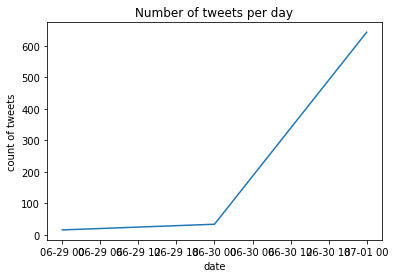

In [63]:
df1=pd.DataFrame({'date':new_df.index, 'count of tweets':new_df.values})

print(df1)

x=df1['date']
y=df1['count of tweets']

plt.plot(x, y)  
plt.xlabel('date') 
plt.ylabel('count of tweets') 
plt.title('Number of tweets per day')  

plt.show() 

In [64]:
altcoin_tweet_count=df.loc["Altcoin"]['tweet'].count()
bitcoin_tweet_count=df.loc["Bitcoin"]['tweet'].count()
coindesk_tweet_count=df.loc["Coindesk"]['tweet'].count()
crypto_tweet_count=df.loc["Cryptocurrency"]['tweet'].count()
gold_tweet_count=df.loc["Gold"]['tweet'].count()
apple_tweet_count=df.loc["Apple"]['tweet'].count()
google_tweet_count=df.loc["Google"]['tweet'].count()
yahoo_tweet_count=df.loc["Yahoo"]['tweet'].count()


tweet_counts_by_keyword=[altcoin_tweet_count,
                         bitcoin_tweet_count,
                         coindesk_tweet_count,
                         crypto_tweet_count,
                         gold_tweet_count,
                         apple_tweet_count,
                         google_tweet_count,
                         yahoo_tweet_count]

print(tweet_counts_by_keyword)

[67, 86, 82, 96, 106, 99, 98, 59]


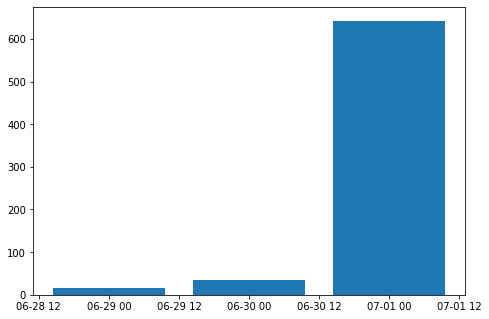

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x=df1['date']
y=df1['count of tweets']

ax.bar(x,y)

plt.show()

In [66]:
tweet_counts_by_keyword

[67, 86, 82, 96, 106, 99, 98, 59]

In [67]:
labels = ['Altcoin','Bitcoin','Coindesk','Cryptocurrency','Gold','Apple','Google','Yahoo']

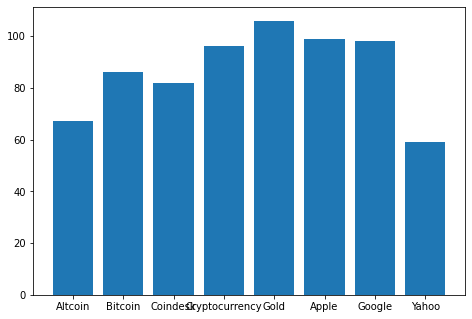

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(labels,tweet_counts_by_keyword)
plt.show()